hello!

question to analyze:
predict alcohol consumption based on religion

1. Inspect the datasets
2. Cleanup the data (reduce features, consolidate features, handle nans)
3. Analyze data distribution, trends, correlations
4. Build a regression model

OECD https://data.oecd.org/healthrisk/alcohol-consumption.htm
WRP https://data.world/cow/world-religion-data


In [68]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
print(glob.glob("*.csv"))

['OECD_Alcohol_Consumption_per_Capita.csv', 'WRP_national_data.csv']


In [70]:
OECD_Alcohol = pd.read_csv('OECD_Alcohol_Consumption_per_Capita.csv',encoding='utf-8')
#alcohol consumption throughout the years, throughout the countries
WRP_national = pd.read_csv('WRP_national_data.csv',encoding='utf-8')
#1995 values, religion over the years


## Inspecting datasets

### OECD_Alcohol

In [71]:
OECD_Alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       2751 non-null   object 
 1   INDICATOR      2751 non-null   object 
 2   SUBJECT        2751 non-null   object 
 3   MEASURE        2751 non-null   object 
 4   FREQUENCY      2751 non-null   object 
 5   TIME           2751 non-null   int64  
 6   LITRES/CAPITA  2751 non-null   float64
 7   Flag Codes     216 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 172.1+ KB


In [72]:
OECD_Alcohol.head(20)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN
5,AUS,ALCOHOL,TOT,LT_CAP15,A,1965,10.0,NaN
6,AUS,ALCOHOL,TOT,LT_CAP15,A,1966,10.3,NaN
7,AUS,ALCOHOL,TOT,LT_CAP15,A,1967,10.8,NaN
8,AUS,ALCOHOL,TOT,LT_CAP15,A,1968,11.1,NaN
9,AUS,ALCOHOL,TOT,LT_CAP15,A,1969,11.6,NaN


In [73]:
for col in OECD_Alcohol.columns:
    if OECD_Alcohol[col].dtype == 'object':
        uniques = OECD_Alcohol[col].unique()
        print(f'''{col} unique values:
        {uniques}''')

LOCATION unique values:
        ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'CHN' 'EST' 'IND' 'IDN'
 'ISR' 'RUS' 'SVN' 'ZAF' 'COL' 'LVA' 'LTU' 'CRI' 'ARG' 'BGR' 'HRV' 'PER'
 'ROU']
INDICATOR unique values:
        ['ALCOHOL']
SUBJECT unique values:
        ['TOT']
MEASURE unique values:
        ['LT_CAP15']
FREQUENCY unique values:
        ['A']
Flag Codes unique values:
        [nan 'B' 'D' 'E' 'P']


In [74]:
#removing obsolete columns


In [75]:
OECD_Alcohol.drop(columns=['INDICATOR', 'SUBJECT','MEASURE','FREQUENCY', 'Flag Codes'], inplace=True)


In [76]:
print(OECD_Alcohol.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       2751 non-null   object 
 1   TIME           2751 non-null   int64  
 2   LITRES/CAPITA  2751 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 64.6+ KB
None


### WRP dataset

In [77]:
WRP_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 84 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1995 non-null   int64  
 1   state         1995 non-null   int64  
 2   name          1995 non-null   object 
 3   chrstprot     1995 non-null   int64  
 4   chrstcat      1995 non-null   int64  
 5   chrstorth     1995 non-null   int64  
 6   chrstang      1995 non-null   int64  
 7   chrstothr     1995 non-null   int64  
 8   chrstgen      1995 non-null   int64  
 9   judorth       1995 non-null   int64  
 10  jdcons        1995 non-null   int64  
 11  judref        1993 non-null   float64
 12  judothr       1995 non-null   int64  
 13  judgen        1995 non-null   int64  
 14  islmsun       1995 non-null   int64  
 15  islmshi       1995 non-null   int64  
 16  islmibd       1995 non-null   int64  
 17  islmnat       1995 non-null   int64  
 18  islmalw       1995 non-null 

In [78]:
WRP_national.head(20)

,year,state,name,chrstprot,chrstcat,chrstorth,chrstang,chrstothr,chrstgen,judorth,...,othrgenpct,sumreligpct,total,dualrelig,datatype,sourcereliab,recreliab,reliabilevel,Version,sourcecode
0,1945,2,USA,66069671,38716742,1121898,2400000,1956807,110265118,821489,...,0.0039,0.9961,1.0000,0,34,2,10,Medium,1.1,13
1,1950,2,USA,73090083,42635882,3045420,3045420,1177214,122994019,1078078,...,0.0041,0.9959,1.0000,0,34,6,28,Low,1.1,18
2,1955,2,USA,79294628,46402368,3454916,2572767,2277091,134001770,944000,...,0.0193,0.9807,0.9999,0,134,5,10,Medium,1.1,15
3,1960,2,USA,90692928,50587880,3334535,2710065,2908939,150234347,973500,...,0.0076,0.9924,0.9999,0,134,2,10,Medium,1.1,13
4,1965,2,USA,94165803,64761783,4792868,2822149,973155,167515758,991200,...,0.0030,0.9970,1.0001,0,134,8,28,Low,1.1,20
5,1970,2,USA,93918347,69119143,5498914,3030647,1300000,172867051,1088550,...,0.0001,0.9999,0.9999,0,134,4,10,Medium,1.1,7
6,1975,2,USA,93578909,77181399,6651649,3239145,2159430,182810532,1185900,...,0.0011,0.9989,0.9999,0,99,99,35,Low,1.1,99
7,1980,2,USA,101216516,75149580,4677202,3576566,2030000,186649864,1284843,...,0.0081,0.9919,1.0001,0,24,4,5,Medium,1.1,7
8,1985,2,USA,107309700,82463100,5245662,3576990,1192330,199787782,1352280,...,0.0012,0.9988,0.9999,0,34,2,10,Medium,1.1,13
9,1990,2,USA,132040181,65530789,6715078,4334627,5804487,214425162,975005,...,0.0006,0.9994,0.9999,0,24,4,7,High,1.1,25


In [79]:
columns = WRP_national.columns

columns = list(columns[40:])
columns2 = ['year','name','nonreligpct']
columns2 += columns
WRP_national = WRP_national[columns2]
WRP_national.head(20)


,nonreligpct,year,name,chrstprotpct,chrstcatpct,chrstorthpct,chrstangpct,chrstothrpct,chrstgenpct,judorthpct,...,othrgenpct,sumreligpct,total,dualrelig,datatype,sourcereliab,recreliab,reliabilevel,Version,sourcecode
0,0.1635,1945,USA,0.4722,0.2767,0.0080,0.0172,0.0140,0.7880,0.0059,...,0.0039,0.9961,1.0000,0,34,2,10,Medium,1.1,13
1,0.1482,1950,USA,0.4800,0.2800,0.0200,0.0200,0.0077,0.8077,0.0071,...,0.0041,0.9959,1.0000,0,34,6,28,Low,1.1,18
2,0.1404,1955,USA,0.4779,0.2796,0.0208,0.0155,0.0137,0.8076,0.0057,...,0.0193,0.9807,0.9999,0,134,5,10,Medium,1.1,15
3,0.1193,1960,USA,0.5020,0.2800,0.0185,0.0150,0.0161,0.8315,0.0054,...,0.0076,0.9924,0.9999,0,134,2,10,Medium,1.1,13
4,0.1020,1965,USA,0.4838,0.3327,0.0246,0.0145,0.0050,0.8607,0.0051,...,0.0030,0.9970,1.0001,0,134,8,28,Low,1.1,20
5,0.1020,1970,USA,0.4679,0.3444,0.0274,0.0151,0.0065,0.8613,0.0054,...,0.0001,0.9999,0.9999,0,134,4,10,Medium,1.1,7
6,0.1148,1975,USA,0.4334,0.3574,0.0308,0.0150,0.0100,0.8466,0.0055,...,0.0011,0.9989,0.9999,0,99,99,35,Low,1.1,99
7,0.1177,1980,USA,0.4445,0.3300,0.0205,0.0157,0.0089,0.8196,0.0056,...,0.0081,0.9919,1.0001,0,24,4,5,Medium,1.1,7
8,0.1065,1985,USA,0.4500,0.3458,0.0220,0.0150,0.0050,0.8378,0.0057,...,0.0012,0.9988,0.9999,0,34,2,10,Medium,1.1,13
9,0.0977,1990,USA,0.5284,0.2622,0.0269,0.0173,0.0232,0.8580,0.0039,...,0.0006,0.9994,0.9999,0,24,4,7,High,1.1,25


In [80]:
WRP_national.drop(columns=[''])

,nonreligpct,nonreligpct
0,0.1635,0.1635
1,0.1482,0.1482
2,0.1404,0.1404
3,0.1193,0.1193
4,0.1020,0.1020
...,...,...
1990,0.0073,0.0073
1991,0.0066,0.0066
1992,0.0083,0.0083
1993,0.0083,0.0083


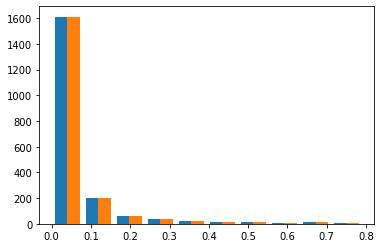

<function matplotlib.pyplot.clf()>

In [81]:
plt.hist(WRP_national.nonreligpct)
plt.show()
plt.clf

### Combining the datasets

In [82]:
OECD_countries = OECD_Alcohol.LOCATION.unique()
WRP_countries = WRP_national.name.unique()
common_countries = [i for i in OECD_countries if i in WRP_countries]
print(common_countries)

['AUS', 'BEL', 'CAN', 'CZE', 'FIN', 'GRC', 'HUN', 'ITA', 'JPN', 'LUX', 'MEX', 'NOR', 'POL', 'TUR', 'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'ISR', 'RUS', 'COL', 'ARG', 'PER']
